In [1]:
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
import os

In [7]:
def generate_fake_data(prefix, cosmo):
    name = 'CC'
    os.system(f'mkdir -p {prefix}')
    cosmo.write_yaml(f'{prefix}/{prefix}.yml')
    def mean_f(z):
        return ccl.h_over_h0(cosmo, 1./(1+z))*cosmo['h']*100

    d = np.load(f'{name}.npz')
    dd = {k: d[k] for k in list(d.keys())}
    dd['data'] = np.random.multivariate_normal(mean_f(dd['z']),
                                               cov=d['cov'])
    np.savez(f'{prefix}/{name}.npz', **dd)

    plt.figure()
    plt.errorbar(d['z'], d['data'], yerr=np.sqrt(np.diag(d['cov'])), fmt='k.')
    plt.plot(dd['z'], mean_f(dd['z']))
    plt.errorbar(dd['z'], dd['data'], yerr=np.sqrt(np.diag(dd['cov'])), fmt='r.');

    name = 'DS17'
    def mean_f(z):
        dL = ccl.luminosity_distance(cosmo, 1./(1+z))
        M = -19.45
        return 5.*np.log10(dL)+25+M

    d = np.load(f'{name}.npz')
    dd = {k: d[k] for k in list(d.keys())}
    dd['data'] = np.random.multivariate_normal(mean_f(dd['z']),
                                               cov=d['cov'])
    np.savez(f'{prefix}/{name}.npz', **dd)

    m = mean_f(dd['z'])
    plt.figure()
    plt.errorbar(d['z'], d['data']/m, yerr=np.sqrt(np.diag(d['cov']))/m, fmt='k.')
    plt.plot(dd['z'], m/m)
    plt.errorbar(dd['z'], dd['data']/m, yerr=np.sqrt(np.diag(dd['cov']))/m, fmt='r.');

    name = 'Wigglez'
    def mean_f(z):
        fz = ccl.growth_rate(cosmo, 1./(1+z))
        Dz = ccl.growth_factor(cosmo, 1./(1+z))
        return cosmo['sigma8']*Dz*fz

    d = np.load(f'{name}.npz')
    dd = {k: d[k] for k in list(d.keys())}
    dd['data'] = np.random.multivariate_normal(mean_f(dd['z']),
                                               cov=d['cov'])
    np.savez(f'{prefix}/{name}.npz', **dd)

    plt.figure()
    plt.errorbar(d['z'], d['data'], yerr=np.sqrt(np.diag(d['cov'])), fmt='k.')
    plt.plot(dd['z'], mean_f(dd['z']))
    plt.errorbar(dd['z'], dd['data'], yerr=np.sqrt(np.diag(dd['cov'])), fmt='r.');

    name = 'DSS'
    def mean_f(z):
        fz = ccl.growth_rate(cosmo, 1./(1+z))
        Dz = ccl.growth_factor(cosmo, 1./(1+z))
        return cosmo['sigma8']*Dz*fz

    d = np.load(f'{name}.npz')
    dd = {k: d[k] for k in list(d.keys())}
    dd['data'] = np.random.multivariate_normal(mean_f(dd['z']),
                                               cov=d['cov'])
    np.savez(f'{prefix}/{name}.npz', **dd)

    plt.figure()
    plt.errorbar(d['z'], d['data'], yerr=np.sqrt(np.diag(d['cov'])), fmt='k.')
    plt.plot(dd['z'], mean_f(dd['z']))
    plt.errorbar(dd['z'], dd['data'], yerr=np.sqrt(np.diag(dd['cov'])), fmt='r.');

    name = 'eBOSS'
    def rd(cosmo):
        wb0 = cosmo['Omega_b']*cosmo['h']**2
        wm0 = (cosmo['Omega_c']+cosmo['Omega_b'])*cosmo['h']**2
        a1 = 0.00785436
        a2 = 0.177084
        a3 = 0.00912388
        a4 = 0.618711
        a5 = 11.9611
        a6 = 2.81343
        a7 = 0.784719
        return 1./(a1*wb0**a2+a3*wm0**a4+a5*wb0**a6*wm0**a7)

    def mean_fs8(z):
        fz = ccl.growth_rate(cosmo, 1./(1+z))
        Dz = ccl.growth_factor(cosmo, 1./(1+z))
        return cosmo['sigma8']*Dz*fz

    def mean_para(z):
        c = 299792.4580
        ez = ccl.h_over_h0(cosmo, 1./(1+z))
        return  c/(cosmo['h']*100*ez*rd(cosmo))

    def mean_perp(z):
        chi = ccl.comoving_radial_distance(cosmo, 1./(1+z))
        return  chi/rd(cosmo)

    d = np.load(f'{name}.npz')
    dd = {k: d[k] for k in list(d.keys())}
    fs8_m = mean_fs8(dd['z'])
    para_m = mean_para(dd['z'])
    perp_m = mean_perp(dd['z'])
    data = np.random.multivariate_normal(np.concatenate([para_m, perp_m, fs8_m]),
                                         cov=d['cov'])
    dd['data'] = data
    dd['para_data'] = data[0]
    dd['perp_data'] = data[1]
    dd['fs8_data'] = data[2]
    np.savez(f'{prefix}/{name}.npz', **dd)

    print(d['data'], dd['data'], np.sqrt(np.diag(d['cov'])))

    name = 'BOSS'
    def mean_fs8(z):
        fz = ccl.growth_rate(cosmo, 1./(1+z))
        Dz = ccl.growth_factor(cosmo, 1./(1+z))
        return cosmo['sigma8']*Dz*fz

    def mean_para(z, r_d):
        return ccl.h_over_h0(cosmo, 1./(1+z))*cosmo['h']*100*rd(cosmo)/r_d

    def mean_perp(z, r_d):
        chi = ccl.comoving_radial_distance(cosmo, 1./(1+z))
        return  chi*r_d/rd(cosmo)

    d = np.load(f'{name}.npz')
    dd = {k: d[k] for k in list(d.keys())}
    para_m = mean_para(d['z'], d['rd'])
    perp_m = mean_perp(d['z'], d['rd'])
    fs8_m = mean_fs8(d['z'])
    data = np.random.multivariate_normal(np.concatenate([para_m, perp_m, fs8_m]),
                                         cov=d['cov'])
    dd['data'] = data
    dd['para_data'] = data[0:3]
    dd['perp_data'] = data[3:6]
    dd['fs8_data'] = data[6:9]
    np.savez(f'{prefix}/{name}.npz', **dd)

    for k in ['data', 'para_data', 'perp_data', 'fs8_data']:
        print(k, d[k], dd[k])

    name = 'CMB'
    def mean_perp(z):
        chi = ccl.comoving_radial_distance(cosmo, 1./(1+z))
        return  100*rd(cosmo)/chi

    d = np.load(f'{name}.npz')
    dd = {k: d[k] for k in list(d.keys())}
    data = mean_perp(d['z'])
    dd['data'] = data
    np.savez(f'{prefix}/{name}.npz', **dd)

    print(d['data'], dd['data'], d['data']-dd['data'], d['err'])

In [3]:
cosmo = ccl.Cosmology(Omega_c=0.265621, Omega_b=0.0494166,
                      h=0.6727, n_s=0.9649, sigma8=0.811, T_CMB=2.7255)
print((cosmo['Omega_c']+cosmo['Omega_b'])*cosmo['h']**2)
#pre = 'cosmo1'
#for s in [1000, 1001, 1002, 1003, 1004]:
#    np.random.seed(s)
#    prefix = f'{pre}_seed{s}'
#    generate_fake_data(prefix, cosmo)


0.142562481300904


In [2]:
cosmo = ccl.Cosmology(Omega_c=0.30, Omega_b=0.0494166*0.30/0.265621,
                      h=0.6727, n_s=0.9649, sigma8=0.811, T_CMB=2.7255)
print((cosmo['Omega_c']+cosmo['Omega_b'])*cosmo['h']**2)
pre = 'cosmo2'
#for s in [1000, 1001, 1002, 1003, 1004]:
#    np.random.seed(s)
#    prefix = f'{pre}_seed{s}'
#    generate_fake_data(prefix, cosmo)

0.16101416827084905


In [4]:
cosmo = ccl.Cosmology(Omega_c=0.265621, Omega_b=0.0494166, w0=-0.9,
                      h=0.6727, n_s=0.9649, sigma8=0.811, T_CMB=2.7255)
print((cosmo['Omega_c']+cosmo['Omega_b'])*cosmo['h']**2)
pre = 'cosmo3'
#for s in [1000, 1001, 1002, 1003, 1004]:
#    np.random.seed(s)
#    prefix = f'{pre}_seed{s}'
#    generate_fake_data(prefix, cosmo)

0.142562481300904


0.17251458975999998
[13.11  30.66   0.439] [12.6098539  29.28984168  0.44468524] [0.87800911 0.5138093  0.04804165]
data [8.12087e+01 9.09029e+01 9.89647e+01 1.51239e+03 1.97522e+03 2.30668e+03
 4.97490e-01 4.57523e-01 4.36148e-01] [8.49105209e+01 8.97642055e+01 1.01047485e+02 1.50672191e+03
 1.97643581e+03 2.30018112e+03 5.38499789e-01 5.70138370e-01
 5.57656215e-01]
para_data [81.2087 90.9029 98.9647] [ 84.91052094  89.76420553 101.0474849 ]
perp_data [1512.39 1975.22 2306.68] [1506.72190952 1976.4358095  2300.1811241 ]
fs8_data [0.49749  0.457523 0.436148] [0.53849979 0.57013837 0.55765621]
[1.05863937] [1.07840172] [-0.01976235] [0.00046]
[13.11  30.66   0.439] [13.15906837 29.84838434  0.42823181] [0.87800911 0.5138093  0.04804165]
data [8.12087e+01 9.09029e+01 9.89647e+01 1.51239e+03 1.97522e+03 2.30668e+03
 4.97490e-01 4.57523e-01 4.36148e-01] [8.22117890e+01 9.22773714e+01 9.79414615e+01 1.51091006e+03
 1.95840948e+03 2.27960841e+03 4.29299693e-01 4.90401855e-01
 4.72824331e-01

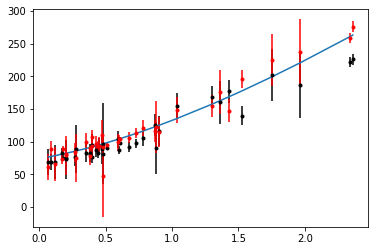

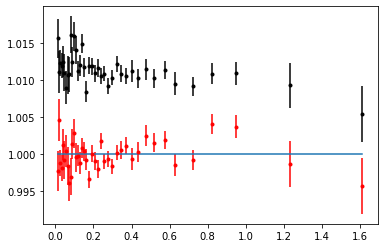

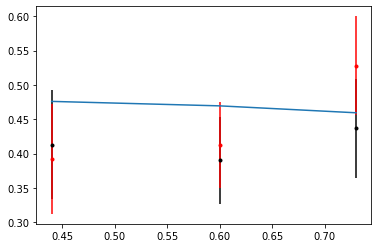

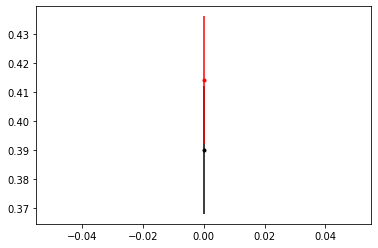

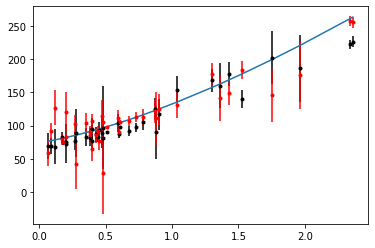

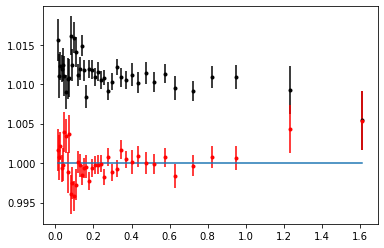

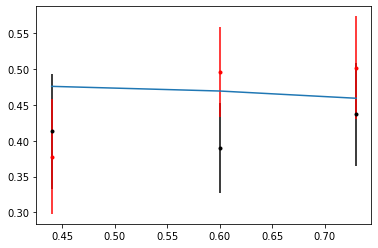

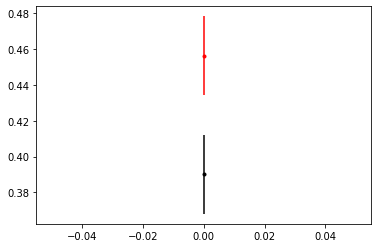

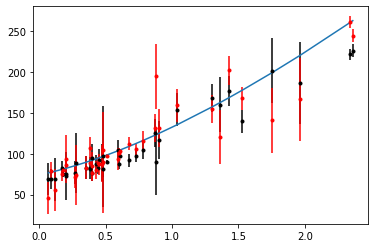

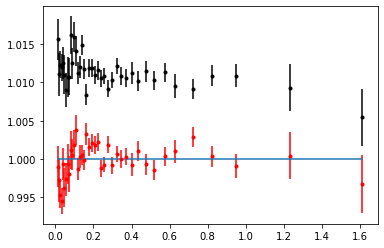

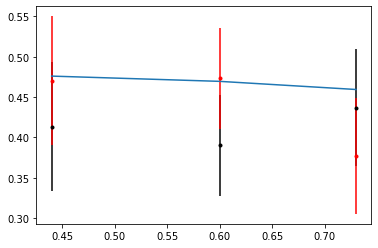

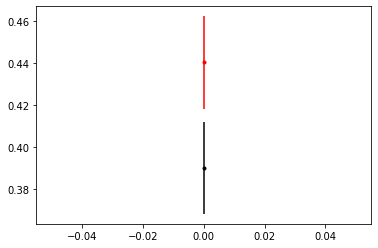

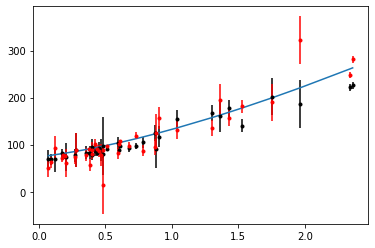

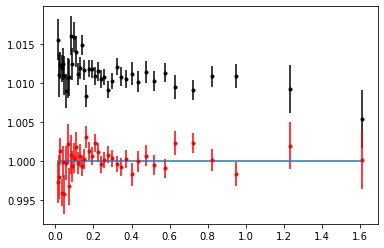

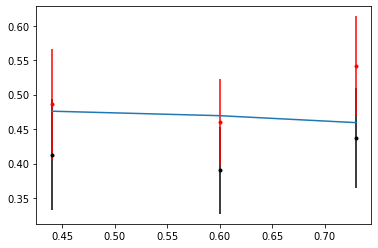

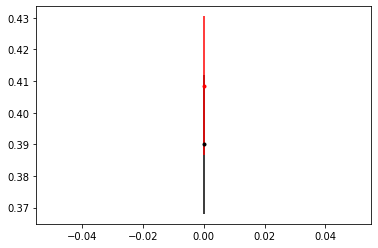

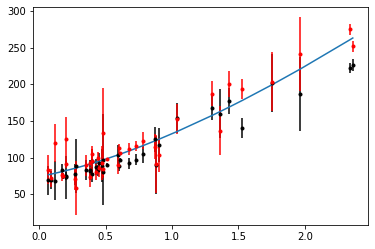

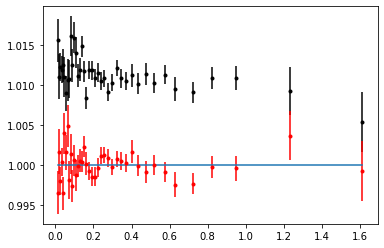

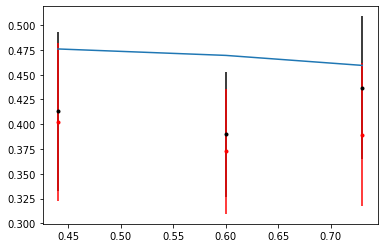

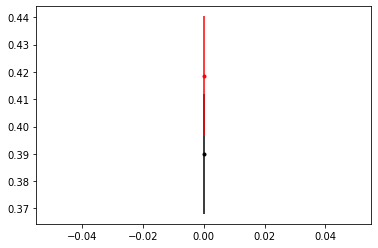

In [8]:
cosmo = ccl.Cosmology(Omega_c=0.265621, Omega_b=0.0494166,
                      h=0.74, n_s=0.9649, sigma8=0.811, T_CMB=2.7255)
print((cosmo['Omega_c']+cosmo['Omega_b'])*cosmo['h']**2)
pre = 'cosmo4'
for s in [1000, 1001, 1002, 1003, 1004]:
    np.random.seed(s)
    prefix = f'{pre}_seed{s}'
    generate_fake_data(prefix, cosmo)

0.21468555769446543
[13.11  30.66   0.439] [12.85968536 32.17210281  0.42828588] [0.87800911 0.5138093  0.04804165]
data [8.12087e+01 9.09029e+01 9.89647e+01 1.51239e+03 1.97522e+03 2.30668e+03
 4.97490e-01 4.57523e-01 4.36148e-01] [7.59080739e+01 8.16884552e+01 9.36397518e+01 1.75590019e+03
 2.27414700e+03 2.62680970e+03 5.87899643e-01 6.02973727e-01
 5.79926826e-01]
para_data [81.2087 90.9029 98.9647] [75.90807387 81.6884552  93.63975179]
perp_data [1512.39 1975.22 2306.68] [1755.90018853 2274.14699839 2626.80970305]
fs8_data [0.49749  0.457523 0.436148] [0.58789964 0.60297373 0.57992683]
[1.05863937] [1.05010096] [0.00853841] [0.00046]
[13.11  30.66   0.439] [13.40889984 32.73064547  0.41183245] [0.87800911 0.5138093  0.04804165]
data [8.12087e+01 9.09029e+01 9.89647e+01 1.51239e+03 1.97522e+03 2.30668e+03
 4.97490e-01 4.57523e-01 4.36148e-01] [7.32093419e+01 8.42016211e+01 9.05337283e+01 1.76008834e+03
 2.25612067e+03 2.60623699e+03 4.78699546e-01 5.23237212e-01
 4.95094943e-01]
pa

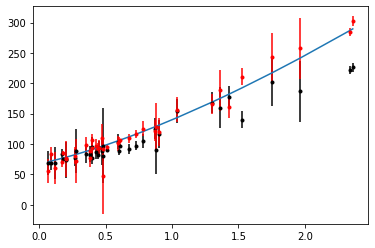

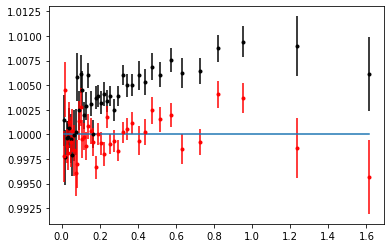

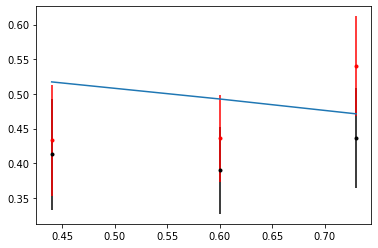

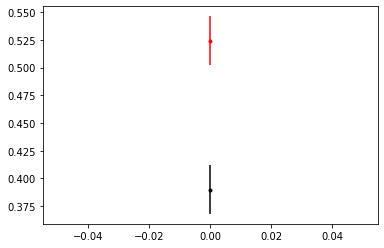

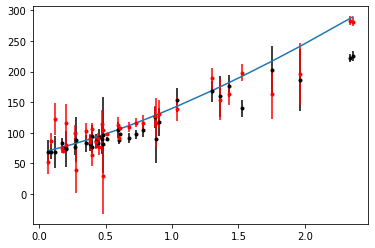

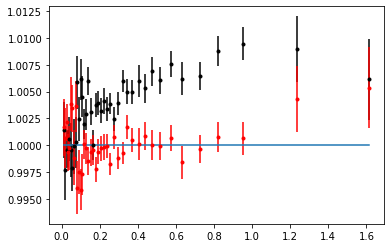

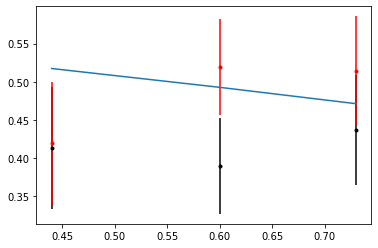

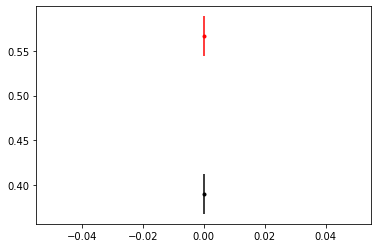

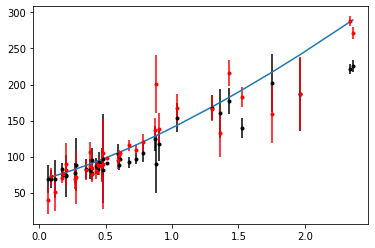

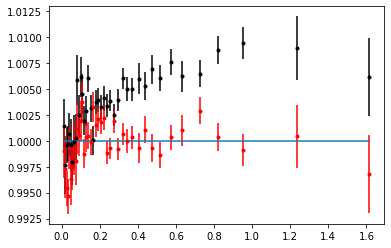

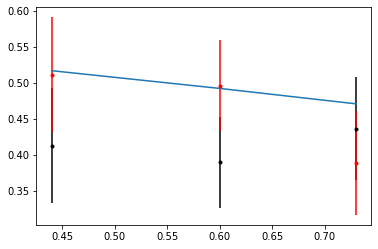

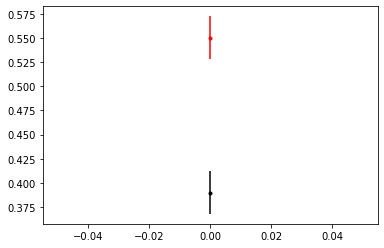

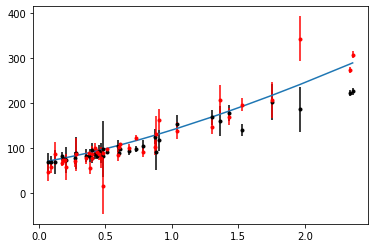

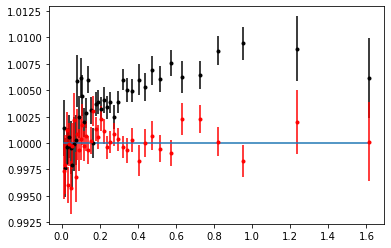

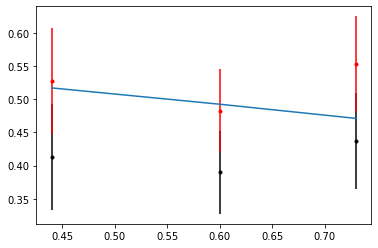

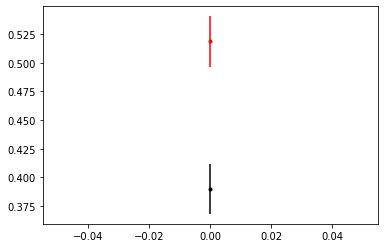

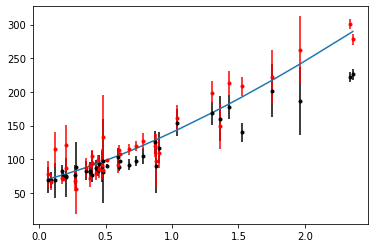

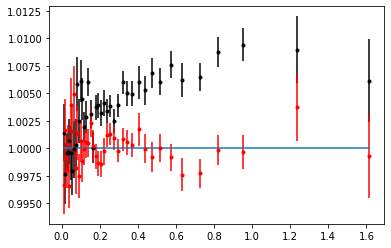

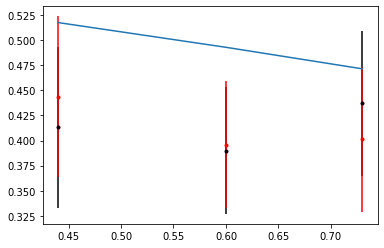

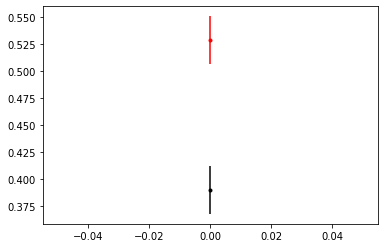

In [10]:
cosmo = ccl.Cosmology(Omega_c=0.40, Omega_b=0.0494166*0.40/0.265621,
                      h=0.6727, n_s=0.9649, sigma8=0.811, T_CMB=2.7255)
print((cosmo['Omega_c']+cosmo['Omega_b'])*cosmo['h']**2)
pre = 'cosmo5'
for s in [1000, 1001, 1002, 1003, 1004]:
    np.random.seed(s)
    prefix = f'{pre}_seed{s}'
    generate_fake_data(prefix, cosmo)